In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Before starting this assignment, you should read the following papers:
- Yonelinas, A. P. (1994). Receiver-Operating Characteristics in Recognition Memory: Evidence for a Dual-Process Model. Journal of Experimental Psychology. Learning, Memory, and Cognition, 20(6), 1341–1354. https://doi.org/10.1037/0278-7393.20.6.1341
- Wixted, J. T. (2007). Dual-process theory and signal-detection theory of recognition memory. Psychological Review, 114(1), 152–176. https://doi.org/10.1037/0033-295X.114.1.152



## Theory: Recognition memory

Recognition memory entails the ability to determine whether an item has been shown before (during a study phase) or not.

#### Experimental paradigm
A typical experimental paradigm that probes recognition memory contains three phases:
1. The study phase, in which a list of stimuli/items is presented (e.g., 'cat', 'dog', 'elephant', 'mouse'). Participants are instructed to pay attention and remember the items that are presented
2. A retention phase, in which the participant engages in an unrelated task (for, e.g., 30 minutes)
3. A test phase, in which a new list of stimuli/items is presented, which contain both items that were shown before (**targets**; e.g., 'dog', 'mouse') and items that were not shown in the study phase (**distractors/lures**; e.g., 'rat', 'monkey'). For each item, the participant is asked whether the item was shown in the study phase or not ('yes' or 'no').


#### Empirical data
In the test phase, participants respond 'yes' or 'no' to the question of whether the item was present in the study phase. Each item could have been either a target or a distractor. This gives a total of four 'responses types':
- If the item was a target, and the participant correctly responded 'yes', we call this a 'hit'
- If the item was a target, and the participant incorrectly responded 'no', we call this a 'miss'
- If the item was a distractor, and the participant correctly responded 'no', we call this a 'correct rejection'
- If the item was a distractor, and the participant incorrectly responded 'yes', we call this a 'false alarm'

This is typically summarized in a decision matrix (or contingency table), where the *rows* refer to whether the stimulus was a target or a distractor, and the columns to the response of the participant:

|   | Respond "yes"  | Respond "no"  |
|---|---|---|
| Target | hit  | miss  |
| Distractor | false alarm |  correct rejection |
| | | |

For each participant, the percentages of hits, misses, false alarms, and correct rejections can be calculated. Example data can look as follows:

In [2]:
!wget -O memory_data1.csv https://surfdrive.surf.nl/files/index.php/s/fysjGRt1BcEUeT2/download
!wget -O memory_data2.csv https://surfdrive.surf.nl/files/index.php/s/lMHd1um7o3qEPLv/download

data = pd.read_csv('./memory_data1.csv')
data.head()

--2025-02-24 13:40:07--  https://surfdrive.surf.nl/files/index.php/s/fysjGRt1BcEUeT2/download
Resolving surfdrive.surf.nl (surfdrive.surf.nl)... 145.100.27.67, 145.107.56.140, 2001:610:10b:2:0:a11:da7a:5afe, ...
Connecting to surfdrive.surf.nl (surfdrive.surf.nl)|145.100.27.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3648 (3.6K) [text/csv]
Saving to: ‘memory_data1.csv’

memory_data1.csv    100%[===================>]   3.56K  --.-KB/s    in 0s      

2025-02-24 13:40:08 (86.4 MB/s) - ‘memory_data1.csv’ saved [3648/3648]

--2025-02-24 13:40:08--  https://surfdrive.surf.nl/files/index.php/s/lMHd1um7o3qEPLv/download
Resolving surfdrive.surf.nl (surfdrive.surf.nl)... 145.107.56.140, 145.100.27.67, 2001:610:10b:2:0:a11:da7a:5afe, ...
Connecting to surfdrive.surf.nl (surfdrive.surf.nl)|145.107.56.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3435 (3.4K) [text/csv]
Saving to: ‘memory_data2.csv’

memory_data2.csv    100%[=========

,item,target_or_distractor,confidence,response
0,snob,target,5.0,no
1,face,distractor,1.0,yes
2,cashier,target,1.0,yes
3,trellis,target,3.0,yes
4,pun,target,2.0,yes


#### Assignment 1: Hit rates and false alarm rates

Using `data`, first make a contingency table. Then, calculate the hit rate and false alarm rate.

response                       no           yes           All
target_or_distractor                                         
distractor             19 (79.2%)    39 (31.0%)    58 (38.7%)
target                  5 (20.8%)    87 (69.0%)    92 (61.3%)
All                   24 (100.0%)  126 (100.0%)  150 (100.0%)


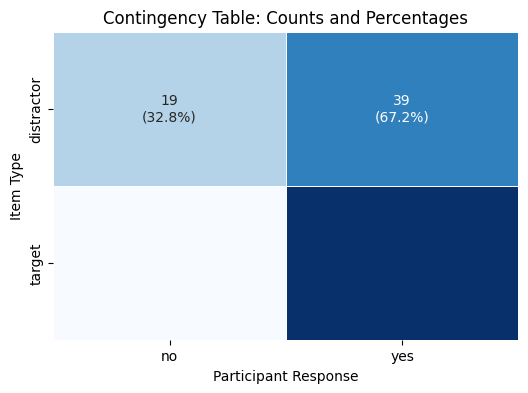

Hit Rate: 0.946
False Alarm Rate: 0.672


In [3]:
contingency_table = pd.crosstab(data['target_or_distractor'], data['response'], margins=True) # Counts
contingency_table_percentage = contingency_table.div(contingency_table.loc["All"], axis=1) * 100  # Percentage
formatted_table = contingency_table.astype(str) + " (" + contingency_table_percentage.round(1).astype(str) + "%)" #Format
print(formatted_table)


def plot_contingency_table(data):
    contingency_table = pd.crosstab(data['target_or_distractor'], data['response'])
    row_sums = contingency_table.sum(axis=1)
    percentage_table = contingency_table.div(row_sums, axis=0) * 100
    annotations = contingency_table.astype(str) + "\n(" + percentage_table.round(1).astype(str) + "%)"
    plt.figure(figsize=(6, 4))
    ax = sns.heatmap(percentage_table, annot=annotations, fmt="", cmap="Blues", linewidths=0.5, cbar=False)
    plt.title("Contingency Table: Counts and Percentages")
    plt.xlabel("Participant Response")
    plt.ylabel("Item Type")
    plt.show()

plot_contingency_table(data)


# Calculate hit rate and false alarm rate
hits = len(data[(data['target_or_distractor'] == 'target') & (data['response'] == 'yes')])
misses = len(data[(data['target_or_distractor'] == 'target') & (data['response'] == 'no')])
false_alarms = len(data[(data['target_or_distractor'] == 'distractor') & (data['response'] == 'yes')])
correct_rejections = len(data[(data['target_or_distractor'] == 'distractor') & (data['response'] == 'no')])

# Compute rates
hit_rate = hits / (hits + misses)
false_alarm_rate = false_alarms / (false_alarms + correct_rejections)

print(f"Hit Rate: {hit_rate:.3f}")
print(f"False Alarm Rate: {false_alarm_rate:.3f}")


## Theory: Receiver-operator characteristic curves

Often, participants are also asked to rate how *confident* they were in their judgement. Assume that these confidence ratings are on a scale from 1 to 8, where 1 means "I am very confident that the item was shown in the study phase", and 8 means "I am very confident that the item was not shown in the study phase".

| Rating | Meaning |
| - | - |
| 1 | Very confident that I've seen this stimulus before ('yes') |
| 2 | Confident that I've seen this stimulus before ('yes') |
| 3 | Somewhat confident that I've seen this stimulus before ('yes') |
| 4 | I'm guessing that I've seen this stimulus before ('yes') |
| 5 | I'm guessing that I've not seen this stimulus before ('no') |
| 6 | Somewhat confident that I've not seen this stimulus before ('no') |
| 7 | Confident that I've seen not this stimulus before ('no') |
| 8 | Very confident that I've not seen this stimulus before ('no') |


A common way of visualizing the relation between false alarm rates is to plot a *receiver-operator characteristic* curve (ROC). To generate this plot, we calculate the hit rate and the false alarm rate for every confidence rating seperately. Specifically:
- We first calculate the hit rate and false alarm rate for only the responses with confidence = 1;
- We then calculate the hit rate and false alarm rate for only the responses with confidence = 1 OR 2;
- We then calculate the hit rate and false alarm rate for only the responses with confidence = 1 OR 2 OR 3;
- We then calculate the hit rate and false alarm rate for only the responses with confidence = 1 OR 2 OR 3 OR 4;
- etc
- Finally we calculate the hit rate and false alarm rate for all responses

**There is an important caveat: In all cases, you divide the number of 'yes'-responses observed in respective confidence rating(s), by the *total* number of targets or lures shown in the experiment**

The ROC curve then plots the hit rate on the y-axis against the false alarm rate on the x-xaxis

#### Assignment 2: ROC curve

<div class='alert alert-warning'>
    <b>ToDo</b> Make a function that takes as input a pandas dataframe, and plots the ROC curve. Then use that function to plot the ROC curve of the `data`. It should look like this:
    <figure>
      <img src="https://surfdrive.surf.nl/files/index.php/s/NiYpeHXys9BNgDr/download" alt="ROC" style="width:200pt">
      <figure>
</div>

In [4]:
def compute_roc_curve(data):
    thresholds = sorted(data['confidence'].unique())
    hit_rates = [0]
    false_alarm_rates = [0]
    total_targets = sum(data['target_or_distractor'] == 'target')
    total_distractors = sum(data['target_or_distractor'] == 'distractor')

    for t in thresholds:
        filtered = data[data['confidence'] <= t]
        hits = 0
        false_alarms = 0

        for i, row in filtered.iterrows():
            if row['target_or_distractor'] == 'target' and row['response'] == 'yes':
                hits += 1  # increment hits for targets
            if row['target_or_distractor'] == 'distractor' and row['response'] == 'yes':
                false_alarms += 1  # increment false alarms for distractors

        if total_targets > 0:
            hit_rate = hits / total_targets  # correctly identified target ratio
        else:
            hit_rate = 0

        if total_distractors > 0:
            false_alarm_rate = false_alarms / total_distractors
        else:
            false_alarm_rate = 0
        hit_rates.append(hit_rate)
        false_alarm_rates.append(false_alarm_rate)

    hit_rates.append(1)
    false_alarm_rates.append(1)

    return false_alarm_rates, hit_rates

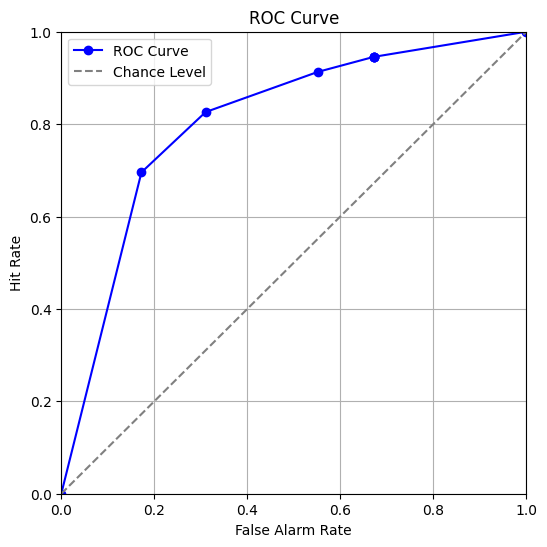

In [5]:
def plot_roc_curve(data):
    fpr, tpr = compute_roc_curve(data)  # false positive rate (FPR) and true positive rate (TPR)

    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, marker='o', linestyle='-', color='b', label='ROC Curve')  # ROC line
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance Level')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel("False Alarm Rate")
    plt.ylabel("Hit Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid()
    plt.show()

plot_roc_curve(data)


## Theory: Formal models
Now that we've explored what empirical data looks like, and how to visualize these data, we will next simulate three models of recognition memory.

- Model 1 assumes the participant did not pay any attention during the study phase, and only makes random guesses during the test phase
- Model 2 is the unequal-variance signal detection (UVSD) model, described by Wixted (2007)
- Model 3 is the dual-process signal detection (DPSD) model, also described by Wixted (2007)

### Formal Model 1: Random guessing

This is a toy model to help you get started, and illustrate what the ROC curve of random guesses look like. Let's begin fresh and assume that the following items were shown in an experiment:

In [6]:
model1_data = pd.read_csv('./memory_data2.csv')
model1_data

,item,target_or_distractor
0,ranger,target
1,server,distractor
2,toad,target
3,normal,target
4,lay,distractor
...,...,...
195,exhibit,target
196,reform,distractor
197,mascara,target
198,yew,target


Let's now simulate random guesses. The basic idea is that we assume that participants have a 'baseline memory strength' associated with each item, and that responses are based on those memory strengths

#### Assignment 3: Simulating random memory strengths

<div class='alert alert-warning'>
    <b>ToDo</b> Create a new column in `model1_data` called '`memory_strength`. Assign to each item in `model1_data` a random memory_strength, drawn from a normal (Gaussian) distribution, with mean 0 and sd 1.
</div>

In [7]:
np.random.seed(42)

model1_data['memory_strength'] = np.random.normal(0, 1, size=len(model1_data))

model1_data.head()

,item,target_or_distractor,memory_strength
0,ranger,target,0.496714
1,server,distractor,-0.138264
2,toad,target,0.647689
3,normal,target,1.523030
4,lay,distractor,-0.234153


In [8]:
model1_data['memory_strength'].describe()

count    200.000000
mean      -0.040771
std        0.931004
min       -2.619745
25%       -0.705128
50%       -0.004192
75%        0.500852
max        2.720169
Name: memory_strength, dtype: float64

Once that's done, you can use the `get_confidence` function below to categorize responses

In [9]:
def get_cuts(n_confidence_bins=8, strength_for_max_confidence=1.5):
    bin_sizes = np.hstack(([-strength_for_max_confidence], np.ones(n_confidence_bins-2)*(3/(n_confidence_bins-2))))
    cuts = np.cumsum(bin_sizes)[::-1]
    return cuts

def get_confidence(memory_strength, n_confidence_bins=8, strength_for_max_confidence=1.5):
    ''' Based on memory strength, determine confidence rating.
    confidence rating = 1 means 'I am very sure this item is old (was shown in the study phase)'
    confidence rating = n_bins means 'I am very sure this item is new (was not shown in the study phase)'

    Items with a memory strength of >= strength_for_max_confidence will always get a maximum confidence rating (n_bins)
    Items with a memory strength of strength_for_maximum_confidence-3 will always get the minimum rating (1)
    The range in between [strength_for_maximum_confidence-3, strength_for_max_confidence] is cut into n_bins equally-sized bins
    '''
    cuts = get_cuts(n_confidence_bins, strength_for_max_confidence)
    cuts = np.hstack((cuts, [-np.Inf]))

    # categorize
    confidence = np.zeros_like(memory_strength)
    for i in range(len(cuts)):
        if i == 1:
            idx = memory_strength > cuts[i]
        else:
            idx = (memory_strength < cuts[i-1]) & (memory_strength >= cuts[i])
        confidence[idx] = i

    return confidence


In [10]:
model1_data['confidence'] = get_confidence(model1_data['memory_strength'])


# model1_data['response'] = np.random.choice(['yes', 'no'], size=len(model1_data)) # Assign random responses (because this is a guessing model)
model1_data['response'] = np.where(model1_data['confidence'] >= 4, 'no', 'yes')

In [11]:
model1_data.head()

,item,target_or_distractor,memory_strength,confidence,response
0,ranger,target,0.496714,3.0,yes
1,server,distractor,-0.138264,4.0,no
2,toad,target,0.647689,2.0,yes
3,normal,target,1.523030,1.0,yes
4,lay,distractor,-0.234153,4.0,no


#### Assignment 4

<div class='alert alert-warning'>
    <b>ToDo</b> Plot the ROC curve of this model
</div>

In [12]:
def compute_roc_curve(data):
    conf_levels = sorted(data['confidence'].unique())

    hit_rates = [0]
    false_alarm_rates = [0]
    total_targets = sum(data['target_or_distractor'] == 'target')
    total_distractors = sum(data['target_or_distractor'] == 'distractor')

    for t in conf_levels:
        filtered = data[data['confidence'] <= t]
        hits = 0
        false_alarms = 0
        for _, row in filtered.iterrows():
            if row['target_or_distractor'] == 'target' and row['response'] == 'yes':
                hits += 1
            if row['target_or_distractor'] == 'distractor' and row['response'] == 'yes':
                false_alarms += 1

        # Compute hit and false alarm rates
        if total_targets > 0:
            hit_rate = hits / total_targets
        else:
            hit_rate = 0

        if total_distractors > 0:
            false_alarm_rate = false_alarms / total_distractors
        else:
            false_alarm_rate = 0

        hit_rates.append(hit_rate)
        false_alarm_rates.append(false_alarm_rate)
    hit_rates.append(1)
    false_alarm_rates.append(1)

    return false_alarm_rates, hit_rates


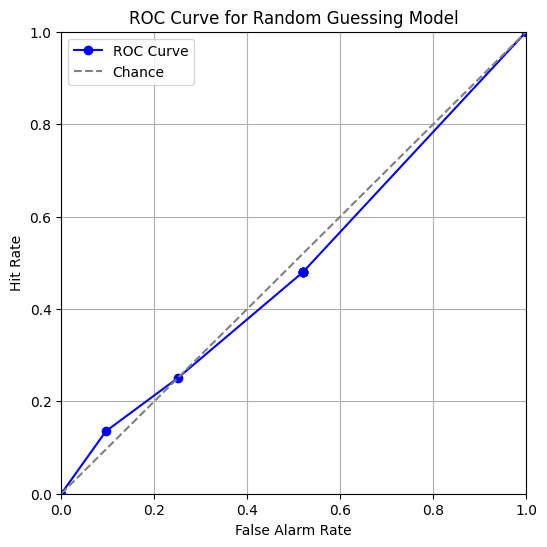

In [13]:
def plot_roc_curve(data):
    # Compute hit rates and false alarm rates
    fpr, tpr = compute_roc_curve(data)

    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, marker='o', linestyle='-', color='b', label='ROC Curve')  # main curve
    plt.plot([0,1], [0,1], '--', color='gray', label='Chance')  # reference diagonal
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel("False Alarm Rate")
    plt.ylabel("Hit Rate")
    plt.title("ROC Curve for Random Guessing Model")
    plt.legend()
    plt.grid()
    plt.show()
plot_roc_curve(model1_data)


### Formal Model 2: UVSD

This model is described my Wixted (2007). It assumes that *distractors* (so items *not* shown in the study phase) have a 'baseline' memory strength, drawn from a Normal distribution with mean 0 and sd 1. *Targets* have a higher memory strength, drawn from a Normal distribution with mean > 0 and sd > 1. To begin simulating this model, start afresh again by loading the empty experimental paradigm:

In [14]:
model2_data = pd.read_csv('./memory_data2.csv')
model2_data

,item,target_or_distractor
0,ranger,target
1,server,distractor
2,toad,target
3,normal,target
4,lay,distractor
...,...,...
195,exhibit,target
196,reform,distractor
197,mascara,target
198,yew,target


#### Assignment 5: Simulating memory strengths of the UVSD model

<div class='alert alert-warning'>
    <b>ToDo</b> Simulate the memory strengths. For all `distractor` items, the memory strength is drawn from a Normal distribution with mean=0 and sd=1. For all `target` items, draw from a Normal distribution with mean=2 and sd=2.
</div>

In [15]:
# Set random seed for reproducibility
np.random.seed(42)

# Simulate memory strengths for UVSD model
memory_strengths = []
for _, row in model2_data.iterrows():
    if row["target_or_distractor"] == "distractor":
        memory_strengths.append(np.random.normal(0, 1))  # Distractors: mean=0, sd=1
    else:
        memory_strengths.append(np.random.normal(2, 2))  # Targets: mean=2, sd=2

# Add the generated memory strengths to the dataframe
model2_data["memory_strength"] = memory_strengths

<div class='alert alert-warning'>
    <b>ToDo</b> Next, add the confidence ratings using the `get_confidence` function, and plot the ROC curve
</div>

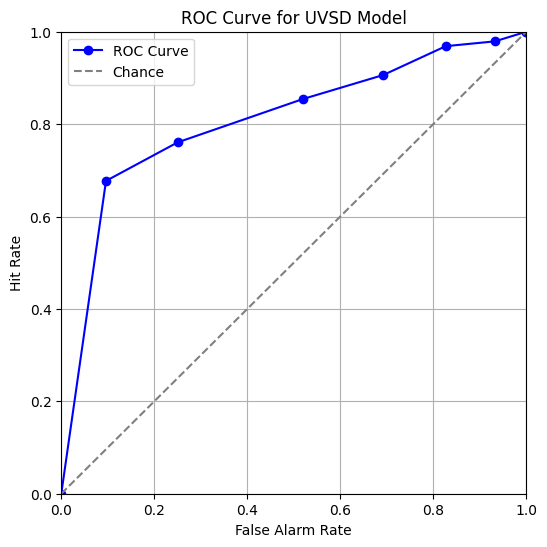

,item,target_or_distractor,memory_strength,confidence
0,ranger,target,2.993428,1.0
1,server,distractor,-0.138264,4.0
2,toad,target,3.295377,1.0
3,normal,target,5.046060,1.0
4,lay,distractor,-0.234153,4.0


In [16]:
model2_data["confidence"] = get_confidence(model2_data["memory_strength"])

def compute_roc_curve(data):
    """Computes hit and false alarm rates for ROC curve."""
    conf_levels = sorted(data["confidence"].unique())

    hit_rates = [0]
    false_alarm_rates = [0]

    total_targets = sum(data["target_or_distractor"] == "target")
    total_distractors = sum(data["target_or_distractor"] == "distractor")

    for t in conf_levels:
        filtered = data[data["confidence"] <= t]

        hits = sum((filtered["target_or_distractor"] == "target"))
        false_alarms = sum((filtered["target_or_distractor"] == "distractor"))

        if total_targets > 0:
            hit_rate = hits / total_targets
        else:
            hit_rate = 0

        if total_distractors > 0:
            false_alarm_rate = false_alarms / total_distractors
        else:
            false_alarm_rate = 0

        hit_rates.append(hit_rate)
        false_alarm_rates.append(false_alarm_rate)

    hit_rates.append(1)
    false_alarm_rates.append(1)

    return false_alarm_rates, hit_rates

def plot_roc_curve(data, title="ROC Curve for UVSD Model"):
    """Plots the ROC curve."""
    fpr, tpr = compute_roc_curve(data)

    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, marker="o", linestyle="-", color="b", label="ROC Curve")
    plt.plot([0,1], [0,1], "--", color="gray", label="Chance")
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel("False Alarm Rate")
    plt.ylabel("Hit Rate")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

plot_roc_curve(model2_data, title="ROC Curve for UVSD Model")

model2_data.head()


### Formal Model 3: DPSD

This model is described by Wixted (2007) and by Yonelinas (1996). It assumes that there are two processes in recognition memory. One process is the *recollection* process, and implies that a proportion of all items is correctly remembered, and immediately assigned the maximum confidence rating (i.e., 1 or 8, depending on whether it was a distractor or a target). If recollection fails, then the second process starts, which is a judgement based on the *familiarity* of an item.
It assumes that *distractors* (so items *not* shown in the study phase) have a 'baseline' memory strength ('familiarity'), drawn from a Normal distribution with mean 0 and sd 1. *Targets* have a higher memory strength ('familiarity'), drawn from a Normal distribution with mean > 0 and sd = 1 (NB: so the *same* variance as the distractor items).

To begin simulating this model, start afresh again by loading the empty experimental paradigm:

In [17]:
model3_data = pd.read_csv('./memory_data2.csv')
model3_data

,item,target_or_distractor
0,ranger,target
1,server,distractor
2,toad,target
3,normal,target
4,lay,distractor
...,...,...
195,exhibit,target
196,reform,distractor
197,mascara,target
198,yew,target


#### Assignment 6 part 1: Simulate confidence ratings of recollected items

<div class='alert alert-warning'>
    <b>ToDo</b> Simulate process 1. Assume 20% of the items is correctly recollection, and immediately assign the highest confidence ratings (1 for targets, 8 for distractors) to these items
</div>

In [18]:
# Set random seed for reproducibility
np.random.seed(42)

# calculate the amount of 20% of database
num_recollected = int(len(model3_data) * 0.2)
# get indices of the recollected items from the database
indices_of_recoolected = np.random.choice(model3_data.index, size=num_recollected, replace=False)

# create confidence column in database
model3_data['confidence'] = np.nan

model3_data['confidence'] = model3_data['confidence'].astype('Int64')  # Allows NaN + integers

for index in indices_of_recoolected:
  if model3_data.loc[index, "target_or_distractor"] == "target":
    model3_data.loc[index, "confidence"] = 1
  else:
    model3_data.loc[index, "confidence"] = 8
print(model3_data.loc[indices_of_recoolected])

               item target_or_distractor  confidence
95          emotion               target           1
15        alpenhorn               target           1
30             slot           distractor           8
158          artery           distractor           8
128            good           distractor           8
115      compulsion           distractor           8
69             boon               target           1
170             mop           distractor           8
174     nightingale           distractor           8
45     pumpernickel           distractor           8
66        guestbook               target           1
182           probe           distractor           8
165  simplification           distractor           8
78         songbird           distractor           8
186      greenhouse           distractor           8
177            pill               target           1
56             golf               target           1
152           bride           distractor      

#### Assignment 6 part 2: Simulate memory strengths of the other items

<div class='alert alert-warning'>
    <b>ToDo</b> Simulate process 2. For the items that were *not* recollected, assign a `memory_strength`. For distractor items, the memory strength is drawn from a Normal distribution with mean 0 and sd 1; for target items, the memory strength is drawn from a Normal distribution with mean 1 and sd 1. After simulating these `memory_strengths`, assign confidence ratings using the `get_confidence` function
</div>

In [19]:
# Set random seed for reproducibility
np.random.seed(42)

# get not recollected items, which the confidence of this items are None
not_recollected = model3_data["confidence"].isna()
# create the memory_strength column
model3_data["memory_strength"] = None

for index in model3_data[not_recollected].index:
  if model3_data.loc[index, "target_or_distractor"] == "target":
    model3_data.loc[index, "memory_strength"] = np.random.normal(1,1) # traget item has Normal distribution with mean 1 and sd 1
  else:
    model3_data.loc[index, "memory_strength"] = np.random.normal(0,1) # distractor item has a Normal distribution with mean 0 and sd 1;

# use get_confidence() function convert memory_strength to confidence rating
model3_data.loc[not_recollected, "confidence"] = get_confidence(model3_data.loc[not_recollected, "memory_strength"])
model3_data

,item,target_or_distractor,confidence,memory_strength
0,ranger,target,1,1.496714
1,server,distractor,4,-0.138264
2,toad,target,1,1.647689
3,normal,target,1,2.52303
4,lay,distractor,4,-0.234153
...,...,...,...,...
195,exhibit,target,3,0.285649
196,reform,distractor,1,1.865775
197,mascara,target,1,1.473833
198,yew,target,4,-0.191303


#### Assignment 7. Plot the ROC curve of the DPSD model

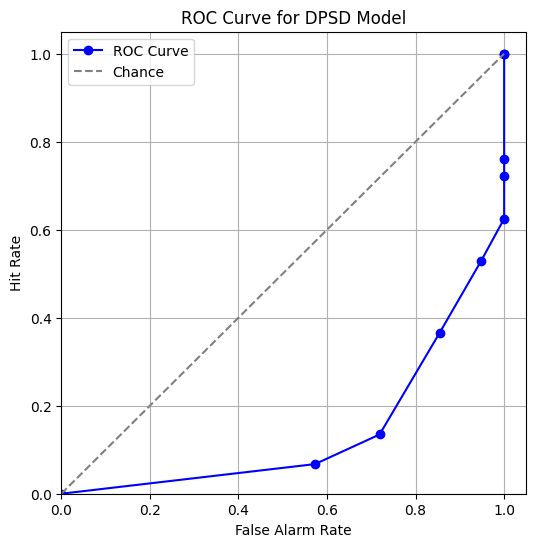

,item,target_or_distractor,confidence,memory_strength
0,ranger,target,1,1.496714
1,server,distractor,4,-0.138264
2,toad,target,1,1.647689
3,normal,target,1,2.52303
4,lay,distractor,4,-0.234153


In [20]:
def compute_roc_curve(data):
  conf_levels = sorted(data["confidence"].unique())
  hit_rates = [0]
  false_alarm_rates = [0]

  total_targets = sum(data["target_or_distractor"] == "target")
  total_distractors = sum(data["target_or_distractor"] == "distractor")

  for threshold in conf_levels:
    filtered = data[data['confidence'] <= threshold]

    hits = sum((filtered["target_or_distractor"] == "target"))
    false_alarms = sum((filtered["target_or_distractor"] == "distractor"))

    if total_targets > 0:
      hit_rate = hits / total_targets
    else:
      hit_rate = 0

    if total_distractors > 0:
      false_alarm_rate = false_alarms / total_distractors
    else:
      false_alarm_rate = 0

    hit_rates.append(hit_rate)
    false_alarm_rates.append(false_alarm_rate)
  hit_rates.append(1)
  false_alarm_rates.append(1)
  return hit_rates, false_alarm_rates

def plot_roc_curve(data, title="ROC Curve for DPSD Model"):
    """Plots the ROC curve."""
    fpr, tpr = compute_roc_curve(data)

    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, marker="o", linestyle="-", color="b", label="ROC Curve")
    plt.plot([0,1], [0,1], "--", color="gray", label="Chance")
    plt.xlim([0,1.05])
    plt.ylim([0,1.05])
    plt.xlabel("False Alarm Rate")
    plt.ylabel("Hit Rate")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

plot_roc_curve(model3_data, title="ROC Curve for DPSD Model")

model3_data.head()